Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

** this data include email and address are not real data **

## Importing library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.set_config_file(sharing='public',theme='pearl',offline=True)

# Data Collection

### Get the data

In [2]:
df = pd.read_csv("Ecommerce Customers")

Checking data attributes and null condition

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
pd.isnull(df).sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### Data attributes information

We'll work with ecommerce customers dataset from one company. It has customer information like email, address, and avatar. The dataset has numerical information like:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

The dataset doesn't has any null value, so we don't need any data cleansing process

# Data Exploratory

the objective of this exploratory is to find which segment should company takes more focus, is it website or mobile apps or maybe the others.

first, pairplotting all numerical attributes

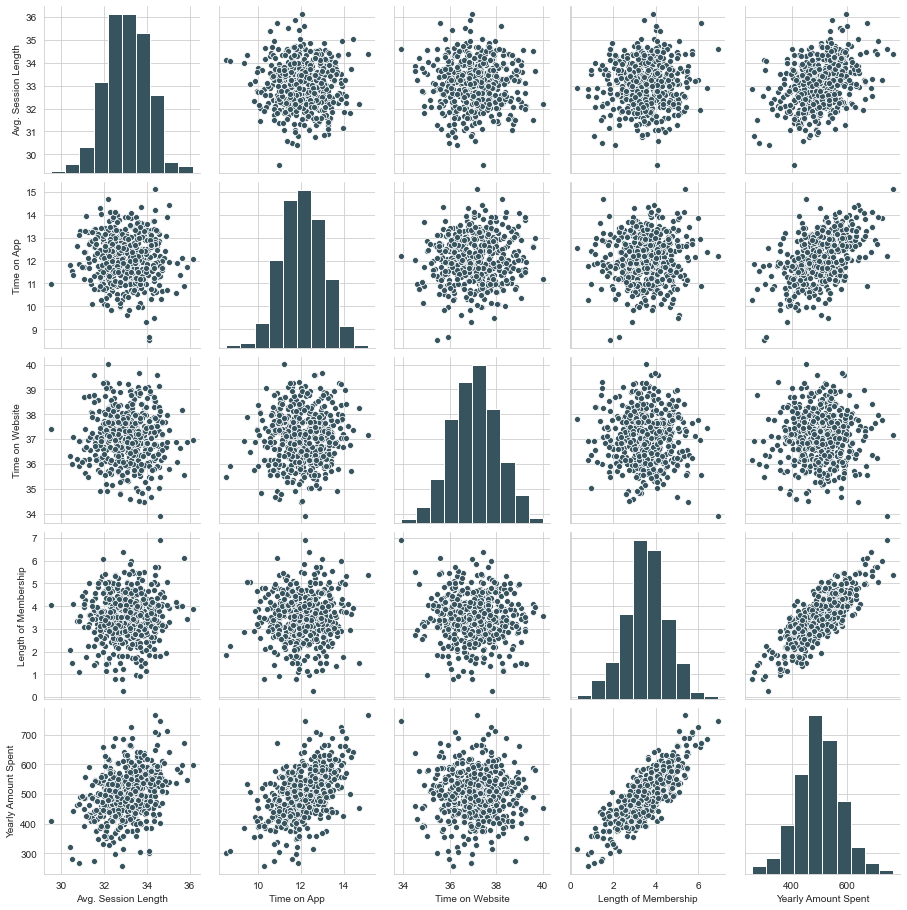

In [6]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')
sns.pairplot(df)

Seems like time on app and length of membership has correlation approuch 1.
I'll try to make a heatmap of numerical attributes correlation value

In [7]:
tc = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']].corr()

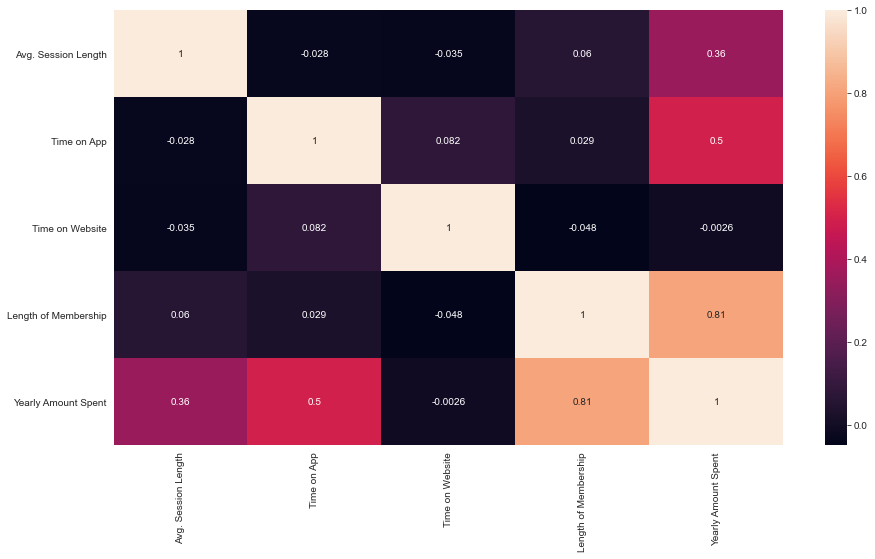

In [8]:
sns.heatmap(tc, annot = True, cmap='rocket')
plt.gcf().set_size_inches(15, 8)

it's true that length of membership, time on app, even avg. session length has a positive correlation.

**Scatter plot to compare Time on App with Yearly Amount Spent**

In [9]:
df.iplot(kind='scatter', mode='markers', x = 'Time on App', y = 'Yearly Amount Spent', color='#68e8cc',
        bestfit = True, bestfit_colors = ['#ad98f5'])

When time on app getting bigger, the yearly amount spent is getting bigger too.

**Scatter plot to compare Time on Website with Yearly Amount Spent**

In [10]:
df.iplot(kind='scatter', mode='markers', x = 'Time on Website', y = 'Yearly Amount Spent', color='#68e8cc',
        bestfit = True, bestfit_colors = ['#ad98f5'])

The bestfit equality of y = ax + b of the plot has negative a value but approch zero. So time on website nearly has no correlation with amount spent.

**Scatter plot to compare Length of Membership with Yearly Amount Spent**

In pairploting all of numerical attributes section, seems the correlation of lenth of membership and yearly amount spent has a perfect scatter plot. So i'll try to plotting with adding bestfit line.

In [11]:
df.iplot(kind='scatter', mode='markers', x = 'Length of Membership', y = 'Yearly Amount Spent', color='#68e8cc',
        bestfit = True, bestfit_colors = ['#ad98f5'])

## Training and Testing Data

In [12]:
y = df['Yearly Amount Spent']
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

i'm using scikit-learn model to split randomly the rows to train and test set.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [14]:
lm = LinearRegression()

train/fit train data to lm

In [15]:
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
print(lm.coef_)

[25.91225933 38.50812563  0.28871629 61.16161032]


Now that we have fit our model, let's evaluate its performance by predicting off the test values

In [17]:
prediction = lm.predict(X_test)

Creating a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predicted Y')

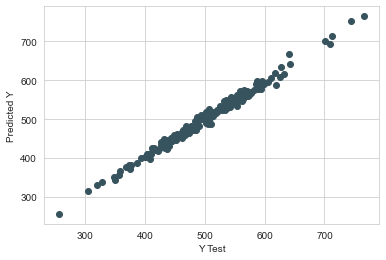

In [18]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.2945465883313165
MSE: 81.90726984520929
RMSE: 9.050263523522908


### Residuals
We should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

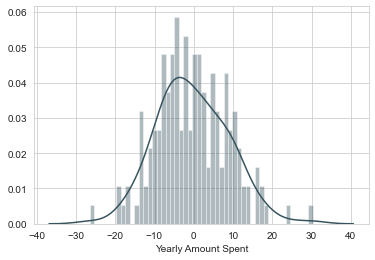

In [20]:
sns.distplot((y_test-prediction),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [21]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.912259
Time on App,38.508126
Time on Website,0.288716
Length of Membership,61.161610


Interpreting the coefficients:

* Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an increase of **25.91** total dollars spent.
* Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an increase of **38.50** total dollars spent.
* Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an increase of **0.29** total dollars spent.
* Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an increase of **61.17** total dollars spent.

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company.